# Leg Point Definition
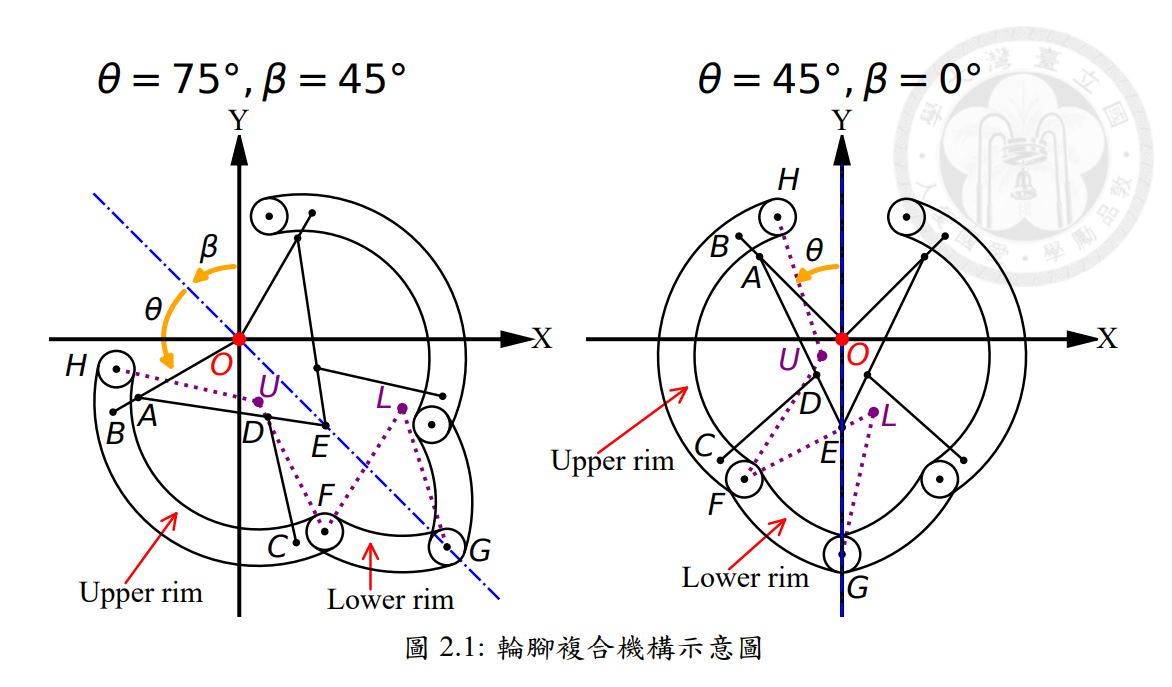
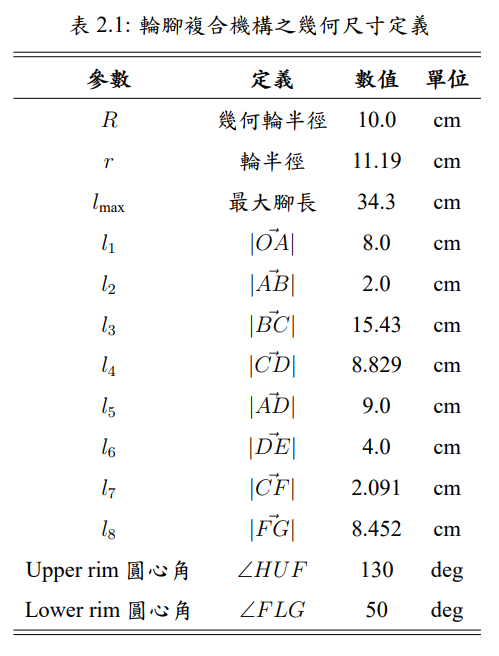

## env setup

In [1]:
import numpy as np
import sys
try:
    import LegModel
    import PlotLeg
except ModuleNotFoundError:
    sys.path.append('../')
    import LegModel
    import PlotLeg
theta = 17
beta = 0


In [2]:
Leg = LegModel.LegModel()


In [3]:
def complex_to_vec(pos):
    return np.array(pos.real, pos.imag)

In [4]:
def plot_point(ax, point, color='red',plot_leg=PlotLeg.PlotLeg()):
    point = ax.plot(point[0], point[1], marker='o', color=color, markersize=plot_leg.leg_shape.mark_size, zorder=plot_leg.leg_shape.zorder+0.00001)[0]


# Plotting Leg

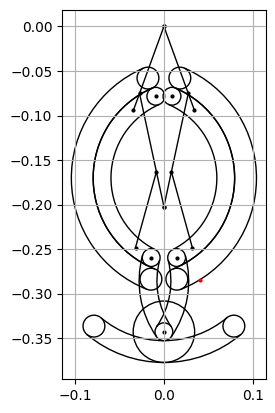

In [5]:
import matplotlib.pyplot as plt
plot_leg = PlotLeg.PlotLeg()  # rad
ax = plot_leg.plot_by_angle(np.deg2rad(160), np.deg2rad(0))
# plot_leg.setting(mark_size=10, line_width=3, color='red')
# ax.plot(complex_to_vec(plot_leg.rim_point(40)), marker='o', color='red', markersize=plot_leg.leg_shape.mark_size, zorder=plot_leg.leg_shape.zorder+0.00001) # plot the ground point
# ax.plot(plot_leg.rim_point(0)[0],plot_leg.rim_point(0)[1], marker='o', color='red', markersize=plot_leg.leg_shape.mark_size, zorder=plot_leg.leg_shape.zorder+0.00001) # plot the ground point
plot_point(ax, plot_leg.rim_point(50), color='red', plot_leg=plot_leg)
ax.grid()
plt.show()

# Rim points

## setup

In [43]:
import matplotlib.pyplot as plt

T = np.array([np.deg2rad(i) for i in range(17,160)])
B = np.array([i*0 for i in range(17,160)])
leg = LegModel.LegModel()
leg.forward(T,B)
# rim_dict[alpha] returns a list of rim points for the given alpha in cartesian coordinates
rim_dict = {}
# rim_dict_polar[alpha] returns a list of rim points for the given alpha in polar coordinates
rim_dict_polar = {}

for alpha in range(-180,180,1):
    rim_dict[alpha] = leg.rim_point(alpha)
    rim_dict_polar[alpha] = []
    # Convert cartesian coordinates to polar coordinates
    for point in rim_dict[alpha]:
        r = np.sqrt(point[0]**2 + point[1]**2)
        theta = np.arctan2(point[1], point[0])
        rim_dict_polar[alpha].append((r, theta))
# print(rim_dict[0])



## Plot

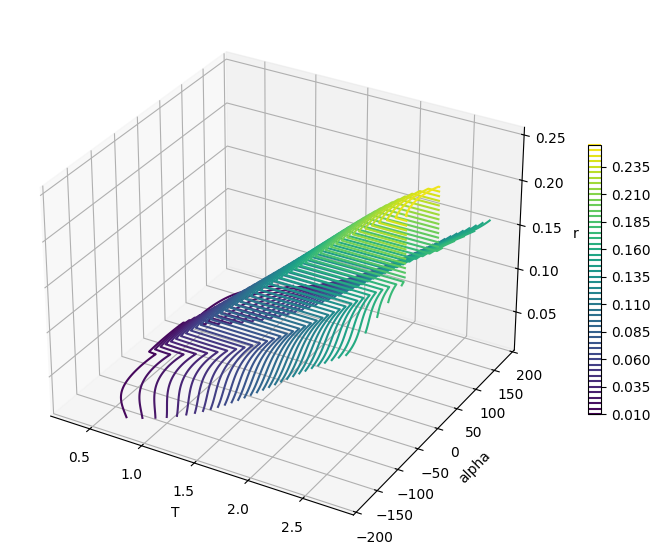

In [44]:
from mpl_toolkits.mplot3d import Axes3D

# Prepare data for 3D contour
T_grid, alpha_grid = np.meshgrid(T, list(rim_dict.keys()))
r_grid = np.zeros_like(T_grid, dtype=float)

for i, a in enumerate(list(rim_dict.keys())):
    for j, t in enumerate(T):
        # Use the first rim point for each alpha and T
        vec = rim_dict_polar[a][j]
        r_grid[i, j] = vec[0]

fig = plt.figure(figsize=(10, 7))
ax3d = fig.add_subplot(111, projection='3d')
contour = ax3d.contour3D(T_grid, alpha_grid, r_grid, 50, cmap='viridis')
ax3d.set_xlabel('T')
ax3d.set_ylabel('alpha')
ax3d.set_zlabel('r')
fig.colorbar(contour, ax=ax3d, shrink=0.5)
plt.show()

### r vs theta

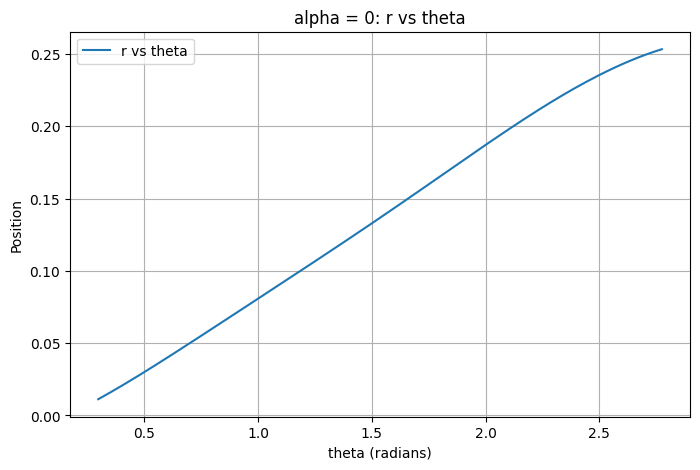

In [45]:
import matplotlib.pyplot as plt

alpha_zero_points = rim_dict_polar[0]
theta_vals = T

r = [pt[0] for pt in alpha_zero_points]
# y = [pt[1] for pt in alpha_zero_points]

plt.figure(figsize=(8, 5))
plt.plot(theta_vals, r, label='r vs theta')
plt.xlabel('theta (radians)')
plt.ylabel('Position')
plt.title('alpha = 0: r vs theta')
plt.legend()
plt.grid()
plt.show()

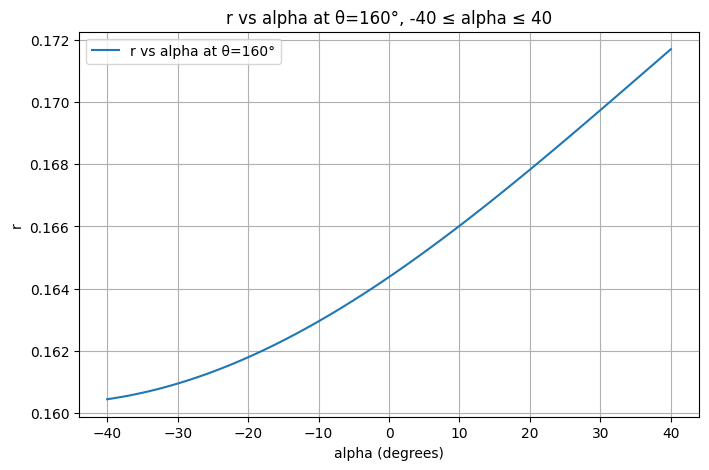

In [ ]:
import matplotlib.pyplot as plt

# Find the index in theta_vals closest to 160 degrees in radians
theta_160_rad = np.deg2rad(160)
idx = (np.abs(theta_vals - theta_160_rad)).argmin()

# Extract r values for theta = 160deg across all alpha
r_160 = r_grid[:, idx]
alpha_list = list(rim_dict.keys())

# Filter alpha and r_160 for -40 <= alpha <= 40
alpha_filtered = [a for a in alpha_list if -40 <= a <= 40]
r_160_filtered = [r_160[i] for i, a in enumerate(alpha_list) if -40 <= a <= 40]

plt.figure(figsize=(8, 5))
plt.plot(alpha_filtered, r_160_filtered, label='r vs alpha at θ=160°')
plt.xlabel('alpha (degrees)')
plt.ylabel('r')
plt.title('r vs alpha at θ=160°, -40 ≤ alpha ≤ 40')
plt.legend()
plt.grid()
plt.show()
